In [97]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [99]:
# Display the top of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [100]:
# A little bit of statistics about the data
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [101]:
# Let's take a look at the data types, and check if there any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [102]:
# We can see that there are no missing values

In [103]:
data = data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

**Exploratory Data Analysis**

Text(0.5, 1.0, 'Chance of Admit Distribution')

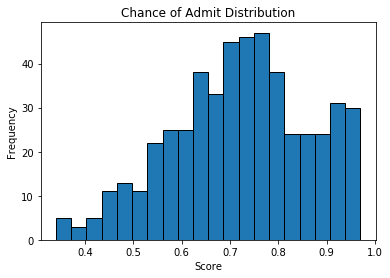

In [104]:
# Let's take a look at our objective distribution
plt.hist(data['Chance of Admit'], bins = 20, edgecolor = 'black');
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Chance of Admit Distribution')

In [105]:
# We can see that most of the admitions has a score between 0.7 to 0.8

In [106]:
# Find all correlations and sort 
correlations_data = data.corr()['Chance of Admit'].sort_values()

# Print the most negative correlations
print(correlations_data.head(9), '\n')

Serial No.           0.008505
Research             0.545871
LOR                  0.645365
SOP                  0.684137
University Rating    0.690132
TOEFL Score          0.792228
GRE Score            0.810351
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64 



In [107]:
# We can see that there is a high correlation between the CPGA, GRE and TOFEL, which make sense.

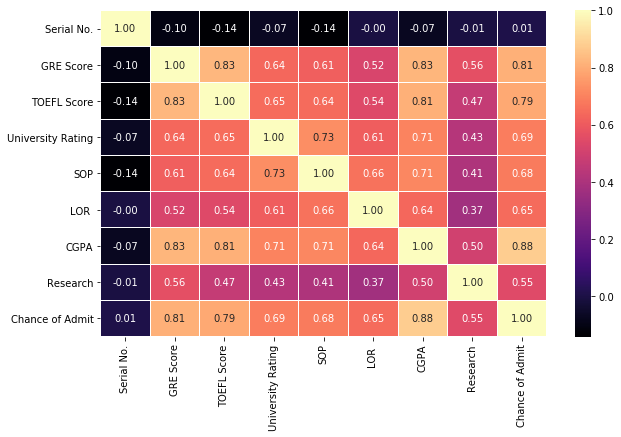

In [108]:
# Another visualize to get a good impression on how our correlation looks like
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [109]:
# Let's visualize the 3 biggest correlative columns with our objective


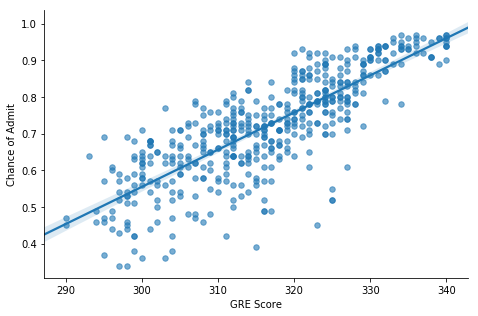

In [110]:
sns.lmplot('GRE Score', 'Chance of Admit', data = data,
          scatter_kws = {'alpha': 0.6, 's': 30},
          height = 4.5, aspect = 1.5);

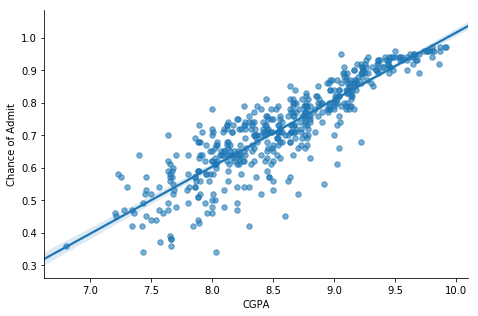

In [111]:
sns.lmplot('CGPA', 'Chance of Admit', data = data,
          scatter_kws = {'alpha': 0.6, 's': 30},
          height = 4.5, aspect = 1.5);

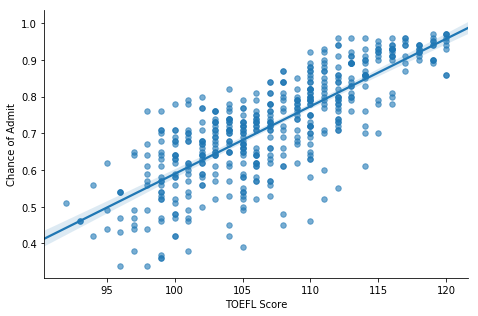

In [112]:
sns.lmplot('TOEFL Score', 'Chance of Admit', data = data,
          scatter_kws = {'alpha': 0.6, 's': 30},
          height = 4.5, aspect = 1.5);

Text(0.5, 1.0, 'Research Distribution')

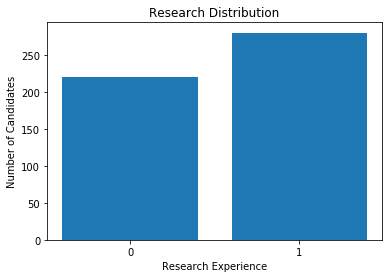

In [113]:
# Now let's take a look at the distribution of our Research feature
x=['0','1']
y = np.array([len(data[data.Research == 0]),len(data[data.Research == 1])])
plt.bar(x,y)
plt.xlabel('Research Experience')
plt.ylabel('Number of Candidates')
plt.title('Research Distribution')

In [114]:
# So we have more candidates that have research experience, then the candidates who don't.

In [115]:
# Now let's take a look at the distribution of our categorical features

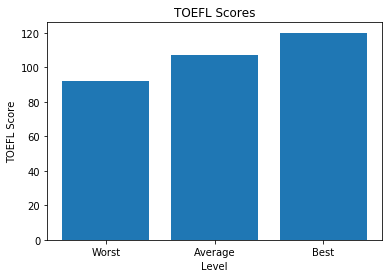

In [116]:
y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.title("TOEFL Scores")
plt.show()

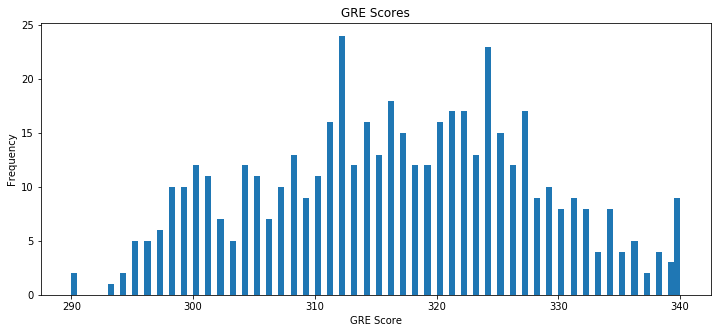

In [117]:
data["GRE Score"].plot(kind = 'hist',bins = 100,figsize = (12,5))
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.title("GRE Scores")
plt.show()

**Predictions Algorithms**

In [118]:
# So after some visualization, let's try some machine learning algorithms to predict the 'Chance of Admit'

In [119]:
# First we will import some libreries

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [121]:
X = data[['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y = data['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
X_train.shape, y_train.shape, X_test.shape

((400, 8), (400,), (100, 8))

In [123]:
# Normalization
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

C:\Users\nadav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\nadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nadav\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = 

In [126]:
## linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_head_lr = lr.predict(X_test)

# R^2 score
print("R_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(X_train)

print('MAE:', metrics.mean_absolute_error(y_test, y_head_lr))


R_square score:  0.865109665313536
MAE: 0.04112468084858787


In [128]:
## Random Forest
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
y_head_rfr = rfr.predict(X_test) 

# R^2 Score
print("R_square score: ", r2_score(y_test,y_head_rfr))

y_head_rf_train = rfr.predict(X_train)

R_square score:  0.8651976479274381


In [129]:
## Decision Tree
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test) 

# R^2 Score
print("R_square score: ", r2_score(y_test,y_head_dtr))

y_head_dtr_train = dtr.predict(X_train)

R_square score:  0.7105373537968507


In [130]:
# We can see that the Random Forest has the best R^2 score

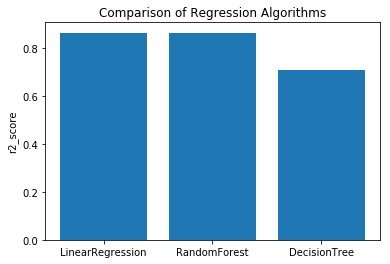

In [131]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForest","DecisionTree"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()